# Dimensionality Reduction by Extracting Principal Components

[Wine](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('wine.csv')
df.shape

(178, 14)

In [3]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
X = df.iloc[:, 1:]

In [5]:
y = df['class']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [8]:
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)
# X_train_sc = sc.fit_transform(X_train)
# X_test_sc = sc.fit_transform(X_test) <--- Wrong approach

C:\Users\Marianne\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Marianne\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Marianne\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
pca.explained_variance_ratio_

array([0.35900066, 0.18691934])

In [12]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.359 0.187]


In [13]:
pd.DataFrame(np.round(pca.components_, 3), columns=X.columns).T

,0,1
Alcohol,0.128,-0.493
Malic acid,-0.256,-0.190
Ash,-0.022,-0.317
Alcalinity of ash,-0.244,0.035
Magnesium,0.148,-0.262
Total phenols,0.385,-0.096
Flavanoids,0.420,-0.015
Nonflavanoid phenols,-0.299,-0.076
Proanthocyanins,0.308,-0.074
Color intensity,-0.119,-0.534


No preceived idea of the number of PCAs we want

In [14]:
pca = PCA(n_components=None)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pca.transform(X_train_sc)

array([[-1.16602698, -3.61532732,  1.15128454, ..., -0.1121504 ,
         0.07147567, -0.75559169],
       [-3.86261156, -0.48217746,  1.72758428, ...,  0.50457041,
        -0.18288356, -0.122403  ],
       [ 2.28353786,  1.27503318, -0.13167658, ...,  0.48017987,
        -0.45893296,  0.41585049],
       ...,
       [ 4.22339048, -2.40345929, -1.13704654, ..., -0.12930554,
        -0.20588086, -0.04785505],
       [-1.80527275,  1.49091985, -0.08991142, ..., -0.50730299,
        -0.48437788,  0.46676777],
       [-0.07808699,  1.19327925,  1.04439979, ..., -0.24025144,
         0.05180158, -0.28153725]])

In [16]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.359 0.187 0.116 0.074 0.067 0.049 0.042 0.027 0.023 0.019 0.017 0.013
 0.008]


In [17]:
np.cumsum(pca.explained_variance_ratio_)

array([0.35900066, 0.54592   , 0.66198557, 0.73570273, 0.80224132,
       0.85078714, 0.89273756, 0.91957678, 0.94305138, 0.96194872,
       0.97910815, 0.99173743, 1.        ])

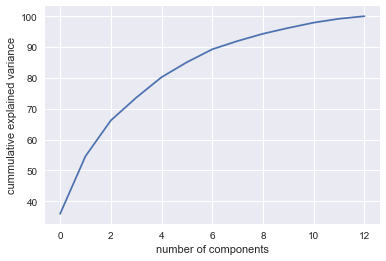

In [18]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100.)
plt.xlabel('number of components')
plt.ylabel('cummulative explained variance');

***

In [19]:
res = pca.transform(X_train_sc)
index_name = ['PCA_'+str(k) for k in range(0, len(res))]

In [24]:
df1 = pd.DataFrame(res, columns=df.columns[1:],
                   index=index_name)[0:4]
df1.T.sort_values(by='PCA_0')

,PCA_0,PCA_1,PCA_2,PCA_3
Malic acid,-3.615327,-0.482177,1.275033,-2.496962
Alcohol,-1.166027,-3.862612,2.283538,-1.678507
Proline,-0.755592,-0.122403,0.415850,-0.791136
Proanthocyanins,-0.639966,-0.005981,-0.481336,-0.121445
Flavanoids,-0.553745,1.257686,-0.979052,-0.666927
Hue,-0.112150,0.504570,0.480180,-0.319599
OD280/OD315 of diluted wines,0.071476,-0.182884,-0.458933,0.045823
Magnesium,0.221634,-0.226540,0.215798,-0.003420
Color intensity,0.262397,-0.453600,-0.777822,-0.123055
Nonflavanoid phenols,0.918085,-0.113136,-0.678263,0.150849


In [22]:
df2 = pd.DataFrame(res,columns=df.columns[1:])
df2

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,-1.166027,-3.615327,1.151285,1.167179,0.221634,3.062380,-0.553745,0.918085,-0.639966,0.262397,-0.112150,0.071476,-0.755592
1,-3.862612,-0.482177,1.727584,0.467086,-0.226540,-1.016510,1.257686,-0.113136,-0.005981,-0.453600,0.504570,-0.182884,-0.122403
2,2.283538,1.275033,-0.131677,1.107830,0.215798,1.004315,-0.979052,-0.678263,-0.481336,-0.777822,0.480180,-0.458933,0.415850
3,-1.678507,-2.496962,0.556619,1.131270,-0.003420,2.754779,-0.666927,0.150849,-0.121445,-0.123055,-0.319599,0.045823,-0.791136
4,1.572842,0.688203,-1.417945,-0.425082,-0.674013,-0.320546,-0.078362,-0.127387,0.251356,-0.275627,0.309145,-0.119233,0.353050
5,0.202555,2.225773,-0.398619,0.838731,0.689123,1.057946,0.183285,-0.200097,-0.434503,0.909094,-0.233613,-0.190320,-0.047309
6,0.883339,2.004699,-0.292837,-0.708377,-0.303721,0.038459,-0.234952,0.302700,-0.483237,0.166193,-0.557362,0.272664,-0.331796
7,-0.715050,0.202558,-0.809916,-1.850742,-1.649756,0.088414,0.277431,-1.188509,-1.153828,0.245809,0.101598,-0.916741,-0.217981
8,-2.315354,-0.350467,-0.136668,0.771597,-0.507613,-1.650893,0.778538,0.362818,-0.604990,-0.250217,0.138492,-0.284014,-0.332538
9,2.481817,-1.194808,1.004307,0.685273,0.191238,0.331441,0.296284,0.236359,1.278853,-0.221972,-0.265687,-0.131304,0.007792


***